In [1]:
import os
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자 크기
plt.rcParams['font.size'] = 14
# 폰트 설정 시 - 기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')



# 데이터 불러오기

## 1) 학습데이터

In [2]:
BASE_DIR = './data'

In [3]:
train_path = os.path.join(BASE_DIR, '2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210902_update.xlsx')

data = pd.read_excel(train_path)
data = data[1 : ]
data = data.reset_index(drop = True)

In [4]:
# 수치형으로 변환
data.iloc[:,6:] = data.iloc[:,6:].apply(pd.to_numeric)
# data.info()

In [5]:
# target data
target = data[data['홍수사상번호'] == 26]
# target

In [6]:
data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', 
                '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)', 
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)', 
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']

In [7]:
data.columns

Index(['홍수사상번호', '연', '월', '일', '시간', '유입량', '1_유역평균강수', '1_강우(A지역)',
       '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)',
       '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)',
       '2_수위(E지역)', '2_수위(D지역)', '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)',
       '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)', '4_유역평균강수',
       '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)',
       '4_수위(D지역)', '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)',
       '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)', '6_유역평균강수', '6_강우(A지역)',
       '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)'],
      dtype='object')

# 데이터 전처리

## 결측치
- 결측치는 존재하지 않는다.

In [ ]:
data.isna().sum()

홍수사상번호         0
연              0
월              0
일              0
시간             0
유입량          160
1_유역평균강수       0
1_강우(A지역)      0
1_강우(B지역)      0
1_강우(C지역)      0
1_강우(D지역)      0
1_수위(E지역)      0
1_수위(D지역)      0
2_유역평균강수       0
2_강우(A지역)      0
2_강우(B지역)      0
2_강우(C지역)      0
2_강우(D지역)      0
2_수위(E지역)      0
2_수위(D지역)      0
3_유역평균강수       0
3_강우(A지역)      0
3_강우(B지역)      0
3_강우(C지역)      0
3_강우(D지역)      0
3_수위(E지역)      0
3_수위(D지역)      0
4_유역평균강수       0
4_강우(A지역)      0
4_강우(B지역)      0
4_강우(C지역)      0
4_강우(D지역)      0
4_수위(E지역)      0
4_수위(D지역)      0
5_유역평균강수       0
5_강우(A지역)      0
5_강우(B지역)      0
5_강우(C지역)      0
5_강우(D지역)      0
5_수위(E지역)      0
5_수위(D지역)      0
6_유역평균강수       0
6_강우(A지역)      0
6_강우(B지역)      0
6_강우(C지역)      0
6_강우(D지역)      0
6_수위(E지역)      0
6_수위(D지역)      0
일시             0
기온             0
풍속             0
습도             0
dtype: int64

## 이상치

이상치를 파악해보기 위한 방법으로
- KMEANS
- sigma 이용
- Q3 + 1.5 * IQR, Q1 - 1.5 * IQR 등을 고려해보고 있다.
- binning

그리고 이상치로 판단된 값들은 상한 혹은 하한값으로 대체하려 한다.

(추가)

이상치 탐색을 위한 통계적 방법과 활용 방안.pdf [https://www.koreascience.or.kr/article/JAKO202012758284659.pdf]


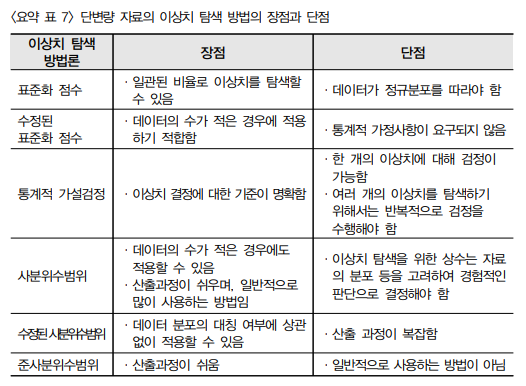

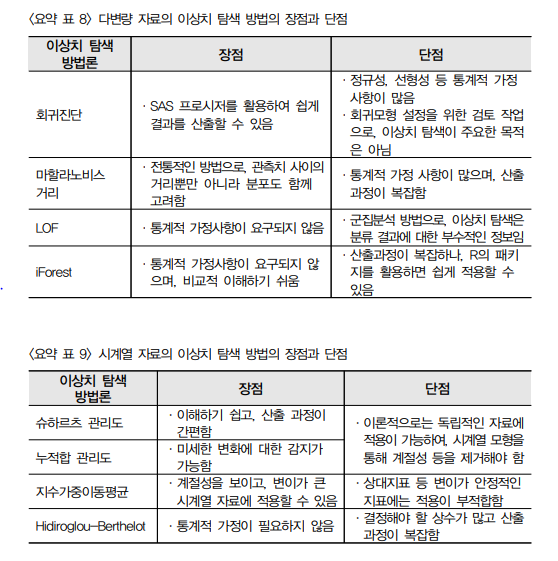

In [9]:
# 홍수사상번호 1~ 25 데이터
data.describe().T

,count,mean,std,min,25%,50%,75%,max
홍수사상번호,3051.0,14.936742,7.575733,1.000000,10.000000,16.000000,22.000000,26.000000
연,3051.0,2011.145198,3.097788,2006.000000,2009.000000,2011.000000,2013.000000,2018.000000
월,3051.0,7.404130,0.689192,6.000000,7.000000,7.000000,8.000000,9.000000
일,3051.0,15.106850,7.850888,1.000000,10.000000,15.000000,20.000000,31.000000
시간,3051.0,12.538184,6.936676,1.000000,7.000000,13.000000,19.000000,24.000000
유입량,2891.0,1746.902717,2181.790290,3.541153,384.762514,1065.549253,2213.014288,21504.402260
1_유역평균강수,3051.0,67.938486,59.359959,0.000000,20.500000,57.198300,103.226400,328.400000
1_강우(A지역),3051.0,78.058669,71.874728,0.000000,22.000000,55.000000,121.000000,329.000000
1_강우(B지역),3051.0,64.361849,63.369565,0.000000,13.000000,52.000000,91.000000,367.000000
1_강우(C지역),3051.0,39.822353,46.097700,0.000000,3.000000,22.000000,65.000000,253.000000


In [11]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

In [25]:
data_cat = data[['홍수사상번호', '연', '월', '일', '시간']]
data_cat['홍수사상번호'] = [str(int(i)) for i in data_cat['홍수사상번호']]
data_num = data[['홍수사상번호', '유입량', '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)']]

In [28]:
data_num[data_num['홍수사상번호'] != 1]

,홍수사상번호,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),1_수위(D지역)
226,2.0,323.993267,0.0000,0,1,0,0,2.93,134.44375
227,2.0,323.154138,0.0000,0,2,0,0,2.91,134.42500
228,2.0,293.240313,0.5000,0,2,0,0,2.90,134.40000
229,2.0,261.177678,1.5000,0,3,0,0,2.89,134.38125
230,2.0,256.388403,2.6000,1,4,1,1,2.88,134.36250
...,...,...,...,...,...,...,...,...,...
3046,26.0,NaN,2.3689,1,0,0,0,3.16,129.99375
3047,26.0,NaN,2.3689,1,0,0,0,3.15,130.00625
3048,26.0,NaN,2.3689,1,0,0,0,3.13,130.01250
3049,26.0,NaN,2.3689,1,0,0,0,3.11,130.01875


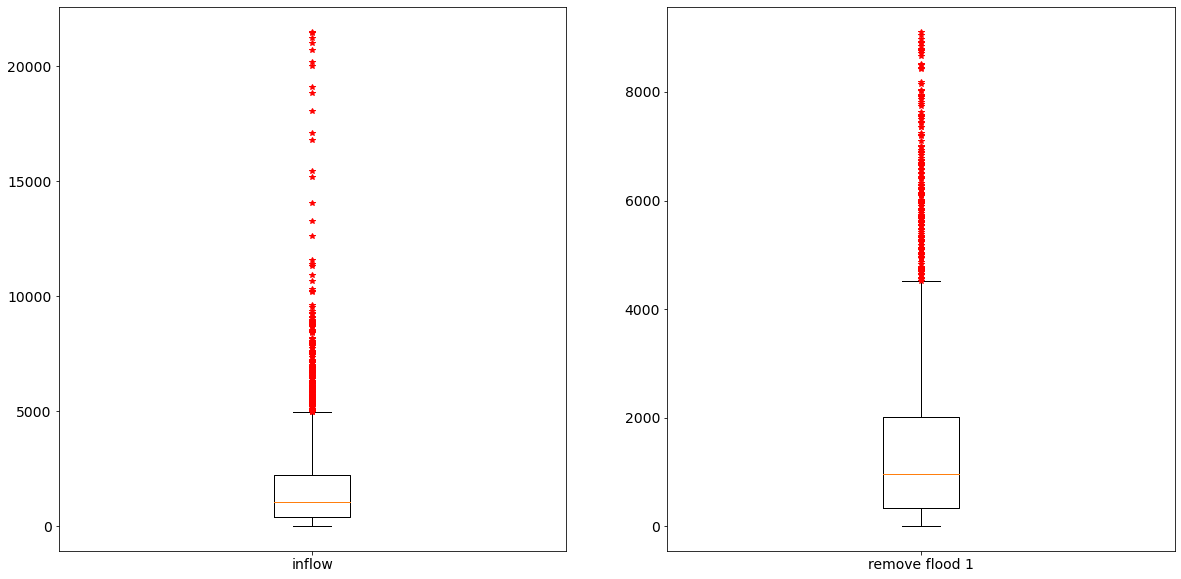

In [29]:
# 사상 1 포함한 유입량과 사상 1 제외한 유입량 비교
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(20, 10)
ax1.boxplot(data_num[['유입량']].dropna(), labels = ['inflow'], sym = 'r*')
ax2.boxplot(data_num[data_num['홍수사상번호'] != 1][['유입량']].dropna(), labels = ['remove flood 1'], sym = 'r*')
plt.show()

사상 1이 포함된 유입량의 이상치는 10000 이상에도 고루 퍼져 있는것을 알 수 있음.

유입량은 실제값이기 때문에 이상치 대체를 하면 유입량 예측에 나쁜 영향을 미칠것이라 생각하여 이상치 대체 대신 사상 1을 제외하고 모델을 만드는 방안을 생각해 보았음.

### sigma

In [30]:
import math
from statistics import stdev

In [31]:
data_outlier = data.copy()

In [33]:
data

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),...,5_강우(D지역),5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역)
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [ ]:
for j in range(1, 26) :
    for i in range(len(data)) :
        if data_outlier[data_outlier['홍수사상번호'] == j].index[0] <= i & i <= data_outlier[data_outlier['홍수사상번호'] == j].index[-1] :   
            if np.mean(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) + stdev(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) * 3 < data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수'].loc[i] :
                print('상한', i)
                data_outlier.loc[i, '3sigma_유역평균강수'] = np.mean(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) + stdev(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) * 3
            elif np.mean(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) - stdev(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) * 3 > data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수'].loc[i] :
                print('하한', i)
                data_outlier.loc[i, '3sigma_유역평균강수'] = np.mean(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) - stdev(data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수']) * 3
            else :
                data_outlier.loc[i, '3sigma_유역평균강수'] = data_outlier[data_outlier['홍수사상번호'] == j]['1_유역평균강수'].loc[i]
        else :
            continue
data_outlier

,홍수사상번호,일시,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역),1_수위(D지역),기온,풍속,습도,3sigma_유역평균강수
0,1.0,2006-07-10 08:00,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,8,2.54,122.56875,24.3,2.0,85.0,6.4000
1,1.0,2006-07-10 09:00,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,8,2.53,122.56250,24.6,1.5,83.0,6.3000
2,1.0,2006-07-10 10:00,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,8,2.53,122.55625,25.4,1.6,79.0,6.4000
3,1.0,2006-07-10 11:00,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,8,2.53,122.55625,25.4,0.9,82.0,7.3000
4,1.0,2006-07-10 12:00,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,10,2.53,122.55625,25.3,0.8,81.0,8.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25.0,2017-07-18 18:00,2017.0,7.0,18.0,18.0,513.368437,22.7836,6,0,1,1,3.03,137.16875,29.8,2.5,72.0,22.7836
2887,25.0,2017-07-18 19:00,2017.0,7.0,18.0,19.0,502.846843,8.2586,2,0,1,1,3.00,137.18125,29.1,1.9,76.0,8.2586
2888,25.0,2017-07-18 20:00,2017.0,7.0,18.0,20.0,491.954805,4.1089,1,0,1,1,2.98,137.18750,28.4,0.6,80.0,4.1089
2889,25.0,2017-07-18 21:00,2017.0,7.0,18.0,21.0,481.103083,3.3854,1,0,1,1,2.96,137.19375,27.4,0.6,92.0,3.3854


In [36]:
# 유역평균강수
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :
    # 평균에서 3sigma 이상 차이가나는 관측치들을 대체하는 작업
    if np.mean(data_outlier['1_유역평균강수']) + stdev(data_outlier['1_유역평균강수']) * 3 < data_outlier['1_유역평균강수'].loc[i] :
        data_outlier.loc[i, '3sigma_유역평균강수_2'] = np.mean(data_outlier['1_유역평균강수']) + stdev(data_outlier['1_유역평균강수']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_유역평균강수']) - stdev(data_outlier['1_유역평균강수']) * 3 > data_outlier['1_유역평균강수'].loc[i] :
        data_outlier.loc[i, '3sigma_유역평균강수_2'] = np.mean(data_outlier['1_유역평균강수']) - stdev(data_outlier['1_유역평균강수']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_유역평균강수_2'] = data_outlier['1_유역평균강수'].loc[i]

print('유역평균강수 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('유역평균강수 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_강우(A지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_강우(A지역)']) + stdev(data_outlier['1_강우(A지역)']) * 3 < data_outlier['1_강우(A지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(A지역)_2'] = np.mean(data_outlier['1_강우(A지역)']) + stdev(data_outlier['1_강우(A지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_강우(A지역)']) - stdev(data_outlier['1_강우(A지역)']) * 3 > data_outlier['1_강우(A지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(A지역)_2'] = np.mean(data_outlier['1_강우(A지역)']) - stdev(data_outlier['1_강우(A지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_강우(A지역)_2'] = data_outlier['1_강우(A지역)'].loc[i]

print('강우(A지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('강우(A지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_강우(B지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_강우(B지역)']) + stdev(data_outlier['1_강우(B지역)']) * 3 < data_outlier['1_강우(B지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(B지역)_2'] = np.mean(data_outlier['1_강우(B지역)']) + stdev(data_outlier['1_강우(B지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_강우(B지역)']) - stdev(data_outlier['1_강우(B지역)']) * 3 > data_outlier['1_강우(B지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(B지역)_2'] = np.mean(data_outlier['1_강우(B지역)']) - stdev(data_outlier['1_강우(B지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_강우(B지역)_2'] = data_outlier['1_강우(B지역)'].loc[i]

print('강우(B지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('강우(B지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_강우(C지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_강우(C지역)']) + stdev(data_outlier['1_강우(C지역)']) * 3 < data_outlier['1_강우(C지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(C지역)_2'] = np.mean(data_outlier['1_강우(C지역)']) + stdev(data_outlier['1_강우(C지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_강우(C지역)']) - stdev(data_outlier['1_강우(C지역)']) * 3 > data_outlier['1_강우(C지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(C지역)_2'] = np.mean(data_outlier['1_강우(C지역)']) - stdev(data_outlier['1_강우(C지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_강우(C지역)_2'] = data_outlier['1_강우(C지역)'].loc[i]

print('강우(C지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('강우(C지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_강우(D지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_강우(D지역)']) + stdev(data_outlier['1_강우(D지역)']) * 3 < data_outlier['1_강우(D지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(D지역)_2'] = np.mean(data_outlier['1_강우(D지역)']) + stdev(data_outlier['1_강우(D지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_강우(D지역)']) - stdev(data_outlier['1_강우(D지역)']) * 3 > data_outlier['1_강우(D지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_강우(D지역)_2'] = np.mean(data_outlier['1_강우(D지역)']) - stdev(data_outlier['1_강우(D지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_강우(D지역)_2'] = data_outlier['1_강우(D지역)'].loc[i]

print('강우(D지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('강우(D지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_수위(E지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_수위(E지역)']) + stdev(data_outlier['1_수위(E지역)']) * 3 < data_outlier['1_수위(E지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_수위(E지역)_2'] = np.mean(data_outlier['1_수위(E지역)']) + stdev(data_outlier['1_수위(E지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_수위(E지역)']) - stdev(data_outlier['1_수위(E지역)']) * 3 > data_outlier['1_수위(E지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_수위(E지역)_2'] = np.mean(data_outlier['1_수위(E지역)']) - stdev(data_outlier['1_수위(E지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_수위(E지역)_2'] = data_outlier['1_수위(E지역)'].loc[i]

print('수위(E지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('수위(E지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

# 1_수위(D지역)
c_num_1 = 0
c_num_2 = 0
for i in range(len(data)) :  
    if np.mean(data_outlier['1_수위(D지역)']) + stdev(data_outlier['1_수위(D지역)']) * 3 < data_outlier['1_수위(D지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_수위(D지역)_2'] = np.mean(data_outlier['1_수위(D지역)']) + stdev(data_outlier['1_수위(D지역)']) * 3
        c_num_1 += 1
    elif np.mean(data_outlier['1_수위(D지역)']) - stdev(data_outlier['1_수위(D지역)']) * 3 > data_outlier['1_수위(D지역)'].loc[i] :
        data_outlier.loc[i, '3sigma_수위(D지역)_2'] = np.mean(data_outlier['1_수위(D지역)']) - stdev(data_outlier['1_수위(D지역)']) * 3
        c_num_2 += 1
    else :
        data_outlier.loc[i, '3sigma_수위(D지역)_2'] = data_outlier['1_수위(D지역)'].loc[i]

print('수위(D지역) 3sigma 상한 초과 이상치 대체 수 :', c_num_1)
print('수위(D지역) 3sigma 하한 미만 이상치 대체 수 :', c_num_2)

유역평균강수 3sigma 상한 초과 이상치 대체 수 : 53
유역평균강수 3sigma 하한 미만 이상치 대체 수 : 0
강우(A지역) 3sigma 상한 초과 이상치 대체 수 : 31
강우(A지역) 3sigma 하한 미만 이상치 대체 수 : 0
강우(B지역) 3sigma 상한 초과 이상치 대체 수 : 53
강우(B지역) 3sigma 하한 미만 이상치 대체 수 : 0
강우(C지역) 3sigma 상한 초과 이상치 대체 수 : 36
강우(C지역) 3sigma 하한 미만 이상치 대체 수 : 0
강우(D지역) 3sigma 상한 초과 이상치 대체 수 : 31
강우(D지역) 3sigma 하한 미만 이상치 대체 수 : 0
수위(E지역) 3sigma 상한 초과 이상치 대체 수 : 40
수위(E지역) 3sigma 하한 미만 이상치 대체 수 : 0
수위(D지역) 3sigma 상한 초과 이상치 대체 수 : 0
수위(D지역) 3sigma 하한 미만 이상치 대체 수 : 0


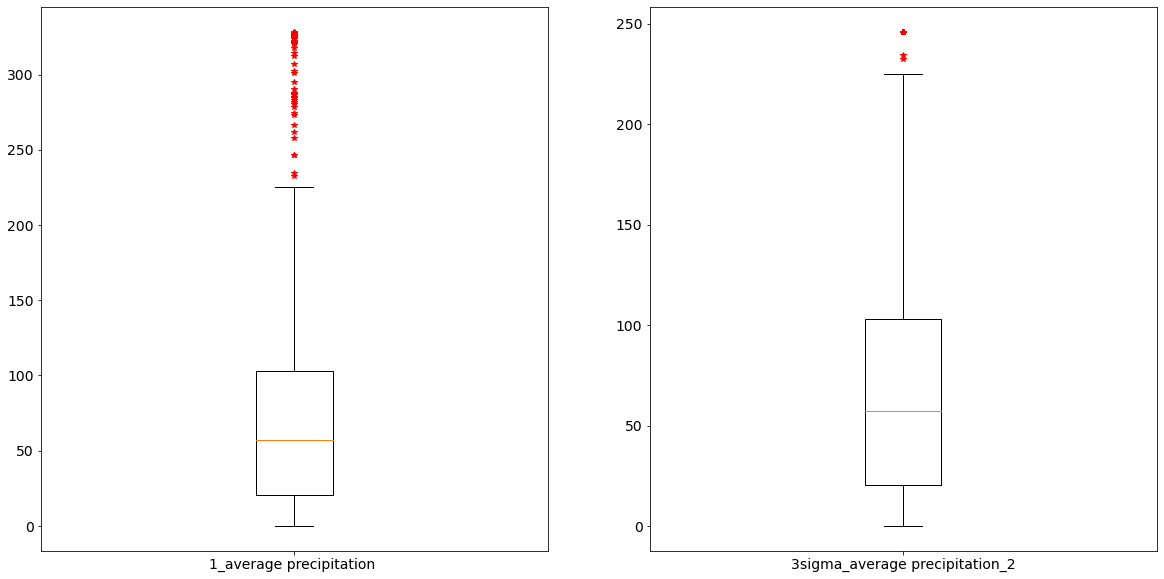

In [37]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(20, 10)

ax1.boxplot(data_num['1_유역평균강수'], labels = ['1_average precipitation '], sym = 'r*')
ax2.boxplot(data_outlier['3sigma_유역평균강수_2'], labels = ['3sigma_average precipitation_2'], sym = 'r*')
plt.show()

데이터 전체로 3sigma 대체를 해본 결과, 250 이상의 값들이 많이 사라진 것을 알 수 있다.